# Bank Customer Churn

## Data Description

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

Complain—customer has complaint or not.

Satisfaction Score—Score provided by the customer for their complaint resolution.

Card Type—type of card hold by the customer.

Points Earned—the points earned by the customer for using credit card.

In [405]:
# import data processing libraries
import pandas as pd
import numpy as np

#import visualizing  libraries
import matplotlib.pyplot as plt
import seaborn as sn

# preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# algorithms and evaluation metrics
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

## Reading the data

In [406]:
data = pd.read_csv('Customer-Churn-Records.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# Data Analysis

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### Dropping of irrelevant features

In [408]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

#### Summary statistics of the numeric data type

In [409]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
data[numeric].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


The above shows the total count of each values, mean, standard deviation, the minimum,  25th percentile, 50th percentile, the maximum number of each numerical features respectively.

### Age binning

The age binning is done to put the age into sections

In [410]:
data['age_bins'] = data['Age'].apply(lambda x: 'adult' if x <= 30 else 'middle age' if x <= 45 else 'old' if x <= 60 else 'very old')

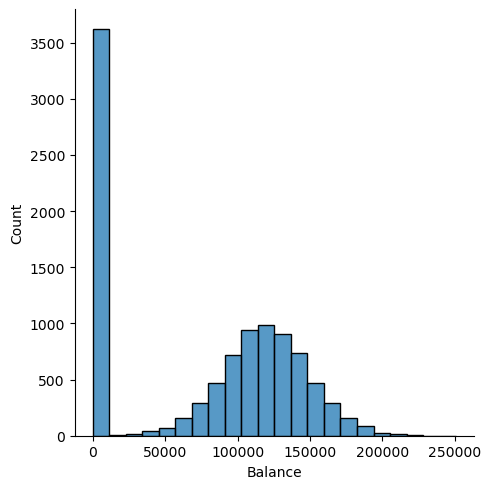

In [411]:
sn.displot(data['Balance']);

The plot above indicates that the majority of the bank customers population has less than 50000 in their account. the minor population has between 100000 and 150000. 

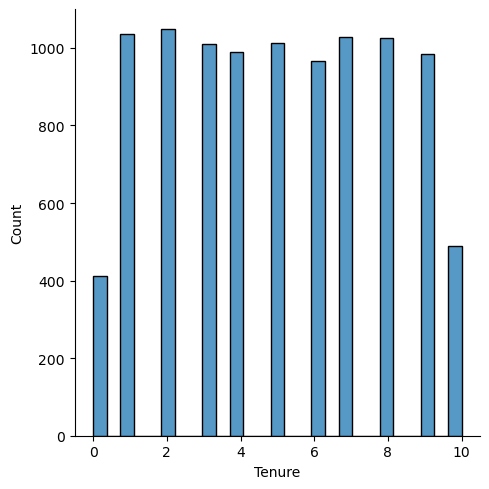

In [412]:
sn.displot(data['Tenure'])

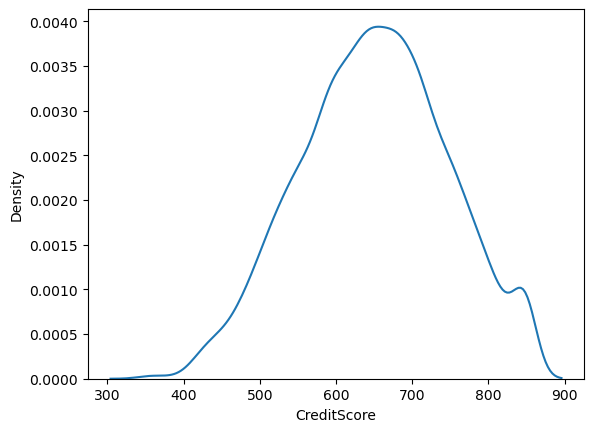

In [413]:
sn.kdeplot(data['CreditScore']);

major population has credits score between 600 and 700

<Axes: xlabel='NumOfProducts', ylabel='Count'>

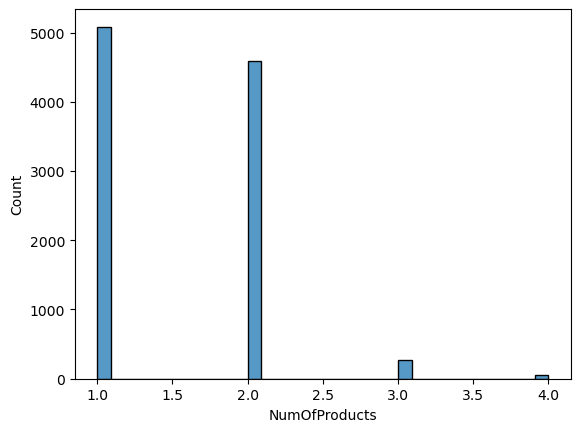

In [414]:
sn.histplot(data['NumOfProducts'])

<Axes: xlabel='Age', ylabel='Count'>

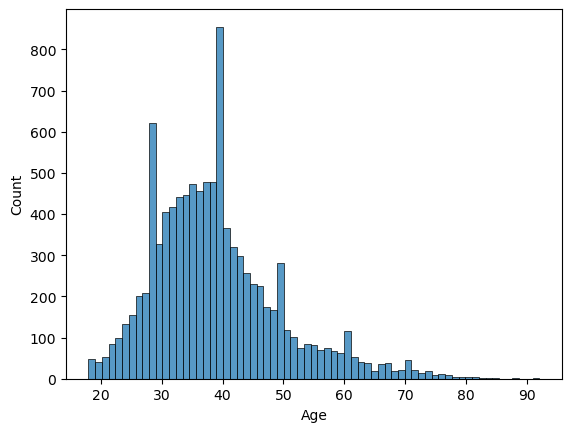

In [415]:
sn.histplot(data['Age'])

customers with age within 25 and 

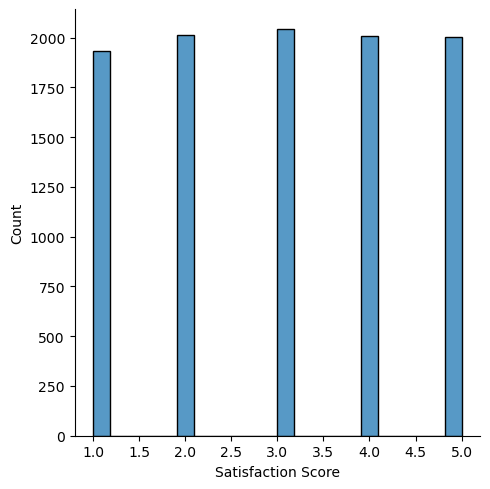

In [416]:
sn.displot(data['Satisfaction Score'])

In [417]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,middle age
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,middle age
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,middle age
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,middle age
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,middle age
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,middle age
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,middle age
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,middle age


<Axes: xlabel='Gender', ylabel='count'>

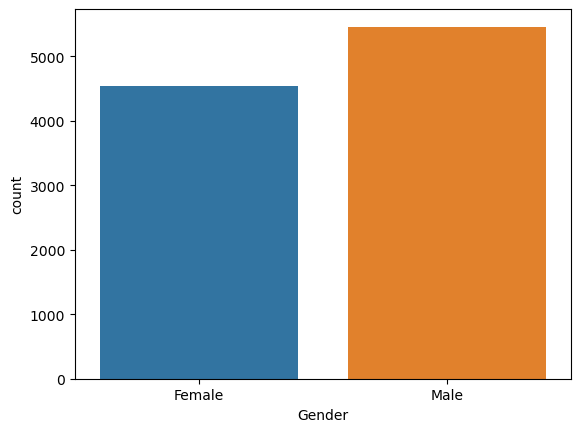

In [418]:
sn.countplot(data, x = 'Gender')

The male gender population is significantly greater than the female customers

In [419]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

The active members count is 5151 and the non active member count is 4849

In [420]:
point_sum = data['Point Earned'].sum()

In [421]:
gender_point_sum =data.groupby('Gender')['Point Earned'].sum().reset_index()
gender_point_sum['percent'] = gender_point_sum['Point Earned'].apply(lambda x: (x/point_sum)*100)
gender_point_sum

,Gender,Point Earned,percent
0,Female,2770274,45.675268
1,Male,3294877,54.324732


The total accumulated points percentage for the female gender is 45.68% and the total for the male gender is 54.32% of the total points accumulated which indicates that the male customer tends to accumulate more points than the female gender.

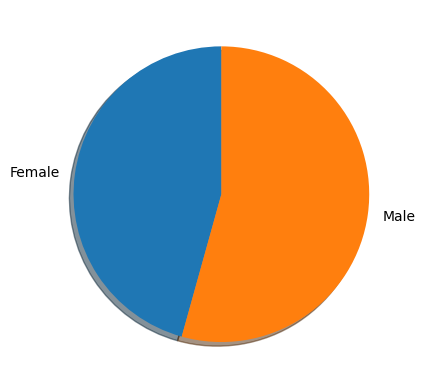

In [422]:
plt.pie(gender_point_sum['percent'], labels=gender_point_sum['Gender'], startangle=90, shadow = True);

In [423]:
gender_point_mean = data.groupby('Gender')['Point Earned'].mean().reset_index()

The female population has 45.67% of the total points and the male gender accumulated 54.324%. 
The average points accumulated by the female gender 609.78 and the male gender 603.78

In [424]:
card = pd.crosstab(index = data['Card Type'], columns = data['Geography'])
card

Geography,France,Germany,Spain
Card Type,,,
DIAMOND,1230,648,629
GOLD,1235,653,614
PLATINUM,1264,608,623
SILVER,1285,600,611


The population of the france citizens that owns the bank card is noticably more than the citizens of Germany and Spain

1230 citizens of france own Diamond card, 648 from Germany and 629 from Spain

1235 citizens of france owns Diamond card, 652 from Germany and 614 from spain

platinum users include 1264 from france, germany has 608 and spain has 623

silver card has 1285 user from france, 600 from germany and 611 from spain

In [425]:
pd.crosstab(index = data['Card Type'], columns=data['Gender'])

Gender,Female,Male
Card Type,,
DIAMOND,1163,1344
GOLD,1062,1440
PLATINUM,1162,1333
SILVER,1156,1340


In [426]:
data.groupby('Gender')['EstimatedSalary'].mean().reset_index()

,Gender,EstimatedSalary
0,Female,100601.541382
1,Male,99664.576931


the average salaries of the female customers is 100601.541 and the male customers is 99664.577. The above specifies that the female gender earns more than the male. 

In [427]:
data.groupby('Card Type')['Point Earned'].sum().reset_index()

,Card Type,Point Earned
0,DIAMOND,1519201
1,GOLD,1519304
2,PLATINUM,1519055
3,SILVER,1507591


In the above table tthe silver card type has the lowest point earned by the customers. with the average value of 604.002

In [428]:
data.groupby('Card Type')['Point Earned'].mean().reset_index()

,Card Type,Point Earned
0,DIAMOND,605.983646
1,GOLD,607.235811
2,PLATINUM,608.839679
3,SILVER,604.002804


In [429]:
data.groupby('age_bins')['Point Earned'].sum().reset_index()

,age_bins,Point Earned
0,adult,1195008
1,middle age,3583905
2,old,998115
3,very old,288123


From the above table, it can be seen that the middle aged people are the ones with the most points and the very old people are the ones with the lowest points. but the average points earned by the middle age is lower due to their population and te very old people has a considerably large points average due to their low population.

In [430]:
data.groupby('age_bins')['Point Earned'].mean().reset_index()

,age_bins,Point Earned
0,adult,607.219512
1,middle age,605.287114
2,old,606.020036
3,very old,620.954741


In [431]:
data.groupby('age_bins')['EstimatedSalary'].sum().reset_index()

,age_bins,EstimatedSalary
0,adult,1.989451e+08
1,middle age,5.916226e+08
2,old,1.648041e+08
3,very old,4.553055e+07


In [432]:
data.groupby(['age_bins', 'Card Type'])['EstimatedSalary'].mean().reset_index()

,age_bins,Card Type,EstimatedSalary
0,adult,DIAMOND,99233.001431
1,adult,GOLD,100236.325667
2,adult,PLATINUM,103105.753621
3,adult,SILVER,101921.104158
4,middle age,DIAMOND,98911.706823
5,middle age,GOLD,100598.725332
6,middle age,PLATINUM,99858.800526
7,middle age,SILVER,100297.670689
8,old,DIAMOND,97197.512494
9,old,GOLD,103009.593582


In [433]:
data.groupby(['age_bins'])['EstimatedSalary'].mean().reset_index()

,age_bins,EstimatedSalary
0,adult,101089.999959
1,middle age,99919.378385
2,old,100063.201220
3,very old,98126.179009


In [434]:
data.groupby(['age_bins', 'Gender'])['EstimatedSalary'].mean().reset_index()

,age_bins,Gender,EstimatedSalary
0,adult,Female,102291.868045
1,adult,Male,100117.900772
2,middle age,Female,100229.978668
3,middle age,Male,99671.501816
4,old,Female,99800.266630
5,old,Male,100325.179685
6,very old,Female,101294.626808
7,very old,Male,95437.416534


From the available data the female gender tends to earn more than the male gender. The middle aged population is significantly higher than other age groups

In [435]:
pd.crosstab(index = data['Card Type'], columns= [data['Gender'], data['age_bins']])

Gender    Female                           Male                         
age_bins   adult middle age  old very old adult middle age  old very old
Card Type                                                               
DIAMOND      233        671  208       51   270        799  213       62
GOLD         208        593  193       68   302        870  195       73
PLATINUM     216        673  214       59   270        792  213       58
SILVER       223        691  207       35   246        832  204       58

In [436]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,middle age
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,middle age
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,middle age
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,middle age
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,middle age
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,middle age
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,middle age
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,middle age


Text(0.5, 1.0, '4. The gender that are still available with the bank')

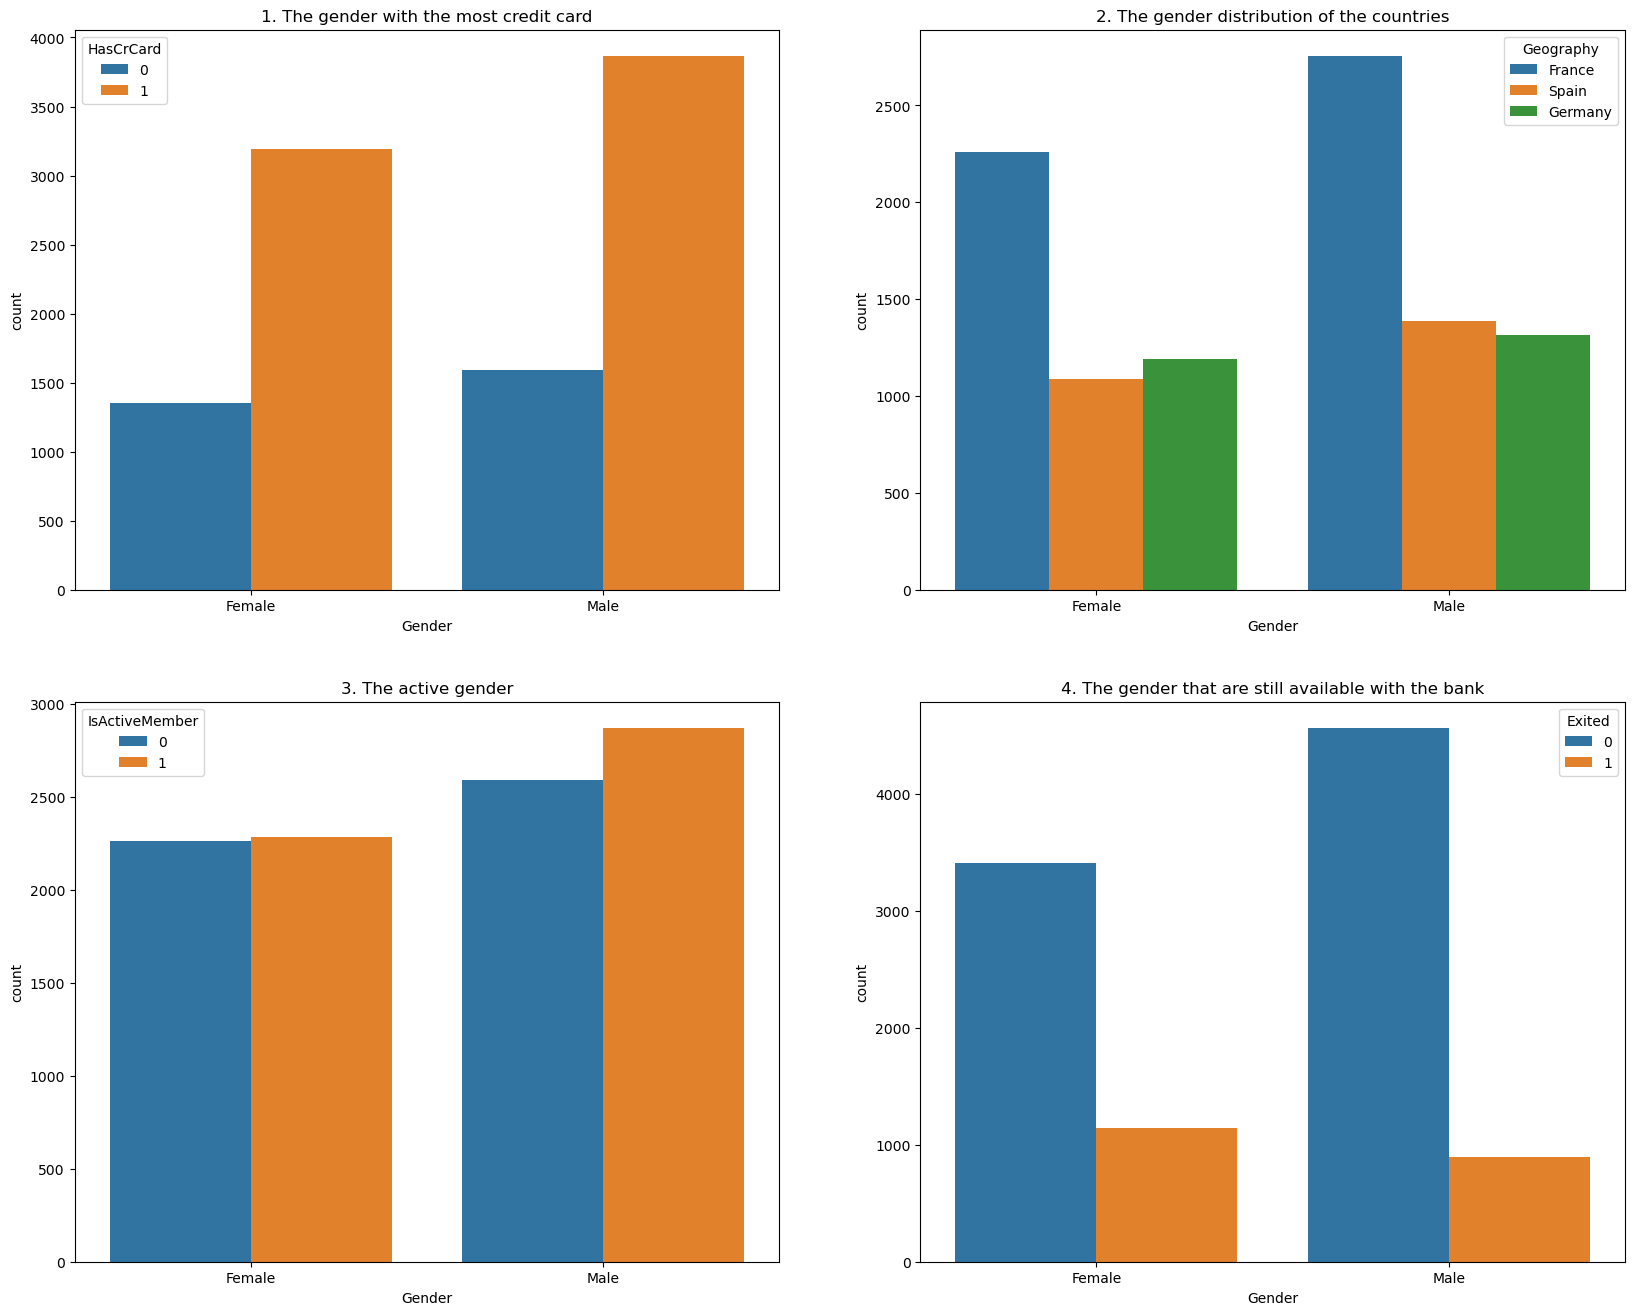

In [437]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sn.countplot(x=data['Gender'], hue = data['HasCrCard'])
plt.title('1. The gender with the most credit card')

plt.subplot(2, 2,2)
sn.countplot(x=data['Gender'], hue = data['Geography'])
plt.title('2. The gender distribution of the countries')

plt.subplot(2, 2, 3)
sn.countplot(x=data['Gender'], hue = data['IsActiveMember'])
plt.title('3. The active gender')

plt.subplot(2, 2, 4)
sn.countplot(x=data['Gender'], hue = data['Exited'])
plt.title('4. The gender that are still available with the bank')

In the first subplot: The male gender has more credit card than the female gender.

The second subplot: The are more customers from france compared to other countries from both genders but the male population is more than the female. The male gender from spain is higher than the female gender population, The female gender from germany is more than the male gender population

<Axes: xlabel='Geography', ylabel='count'>

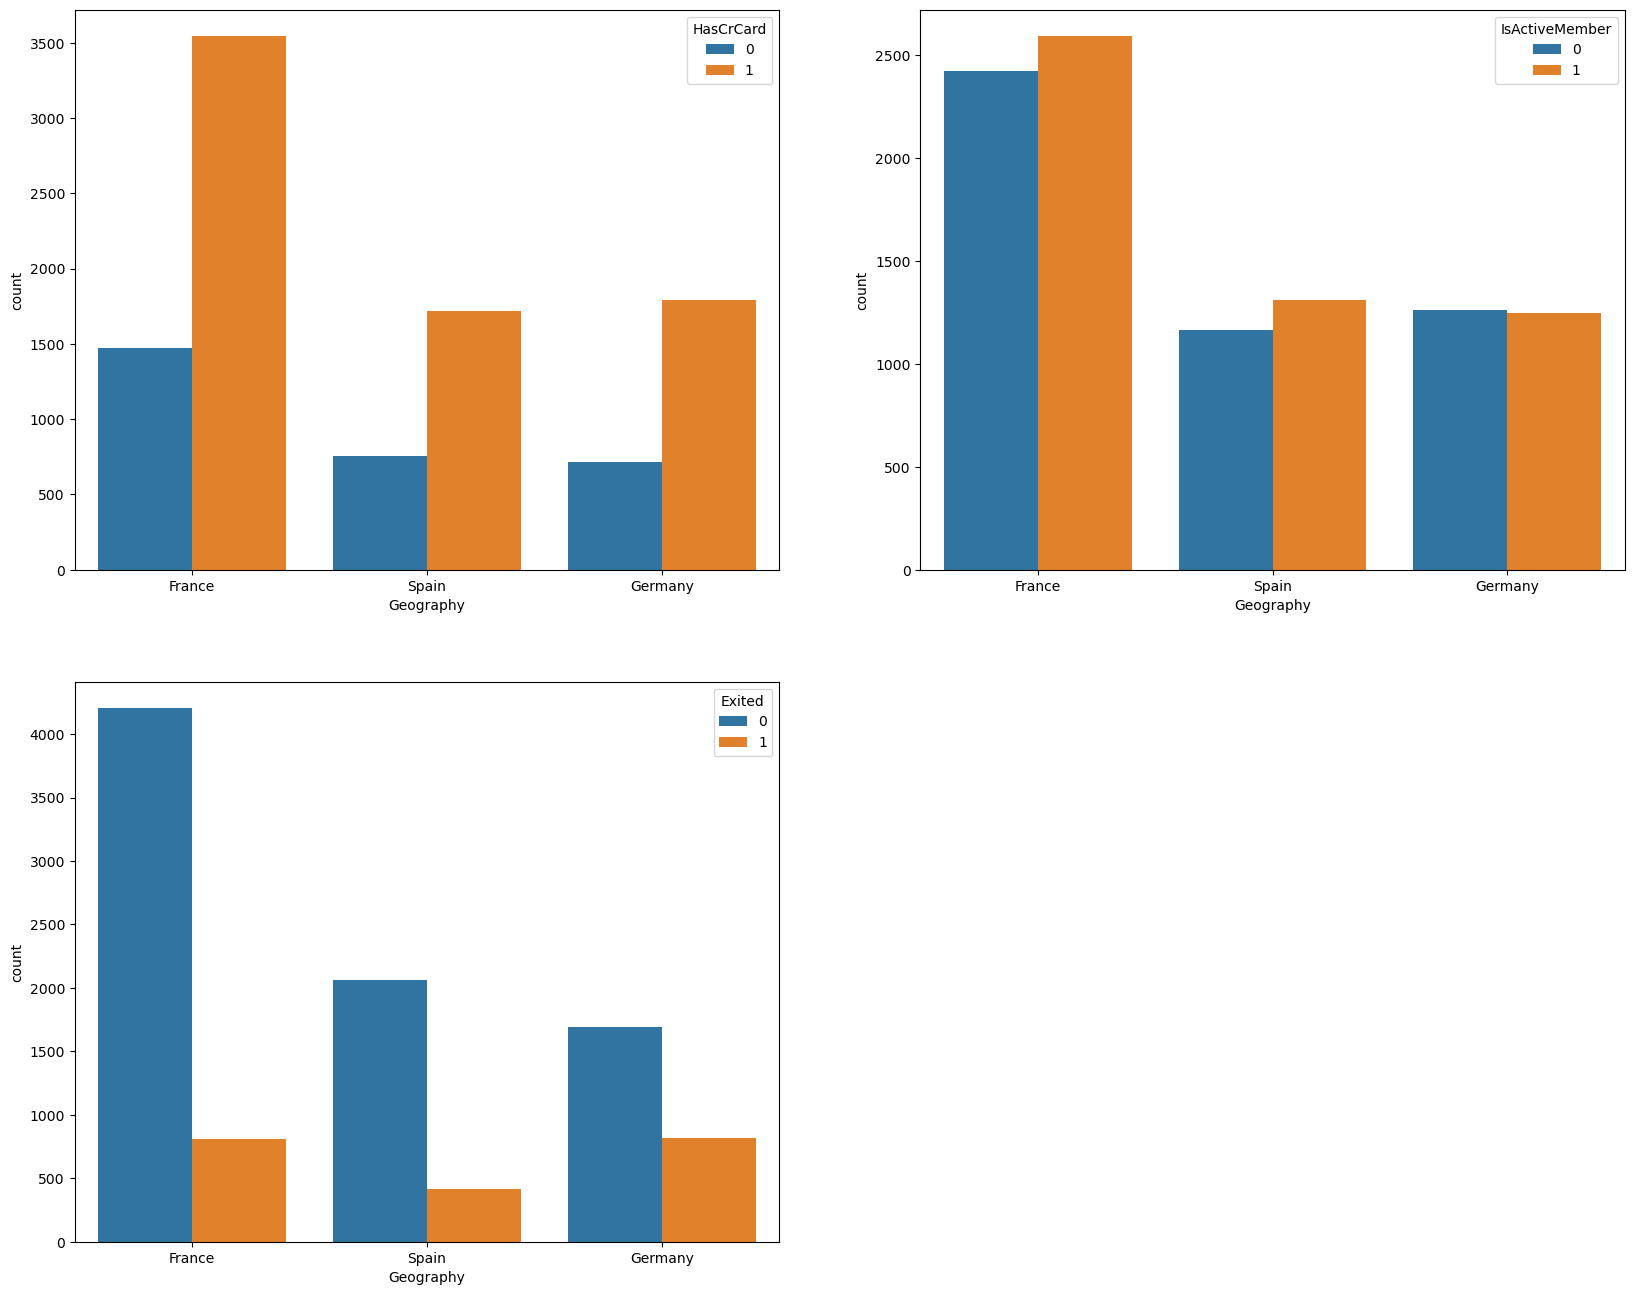

In [438]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sn.countplot(x=data['Geography'], hue = data['HasCrCard'])

plt.subplot(2, 2,2)
sn.countplot(x=data['Geography'], hue = data['IsActiveMember'])

plt.subplot(2, 2, 3)
sn.countplot(x=data['Geography'], hue = data['Exited'])

from the first plot the male gender has more credit cards compare to the female gender, France and spain has more active female members, The female gender has more population of the customers who left the bank across all countries.

In [439]:
data["Satisfaction Score"].value_counts()

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

In [440]:
data["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

The majority of the bank customers purchased product less than 3.

<Axes: xlabel='Gender', ylabel='count'>

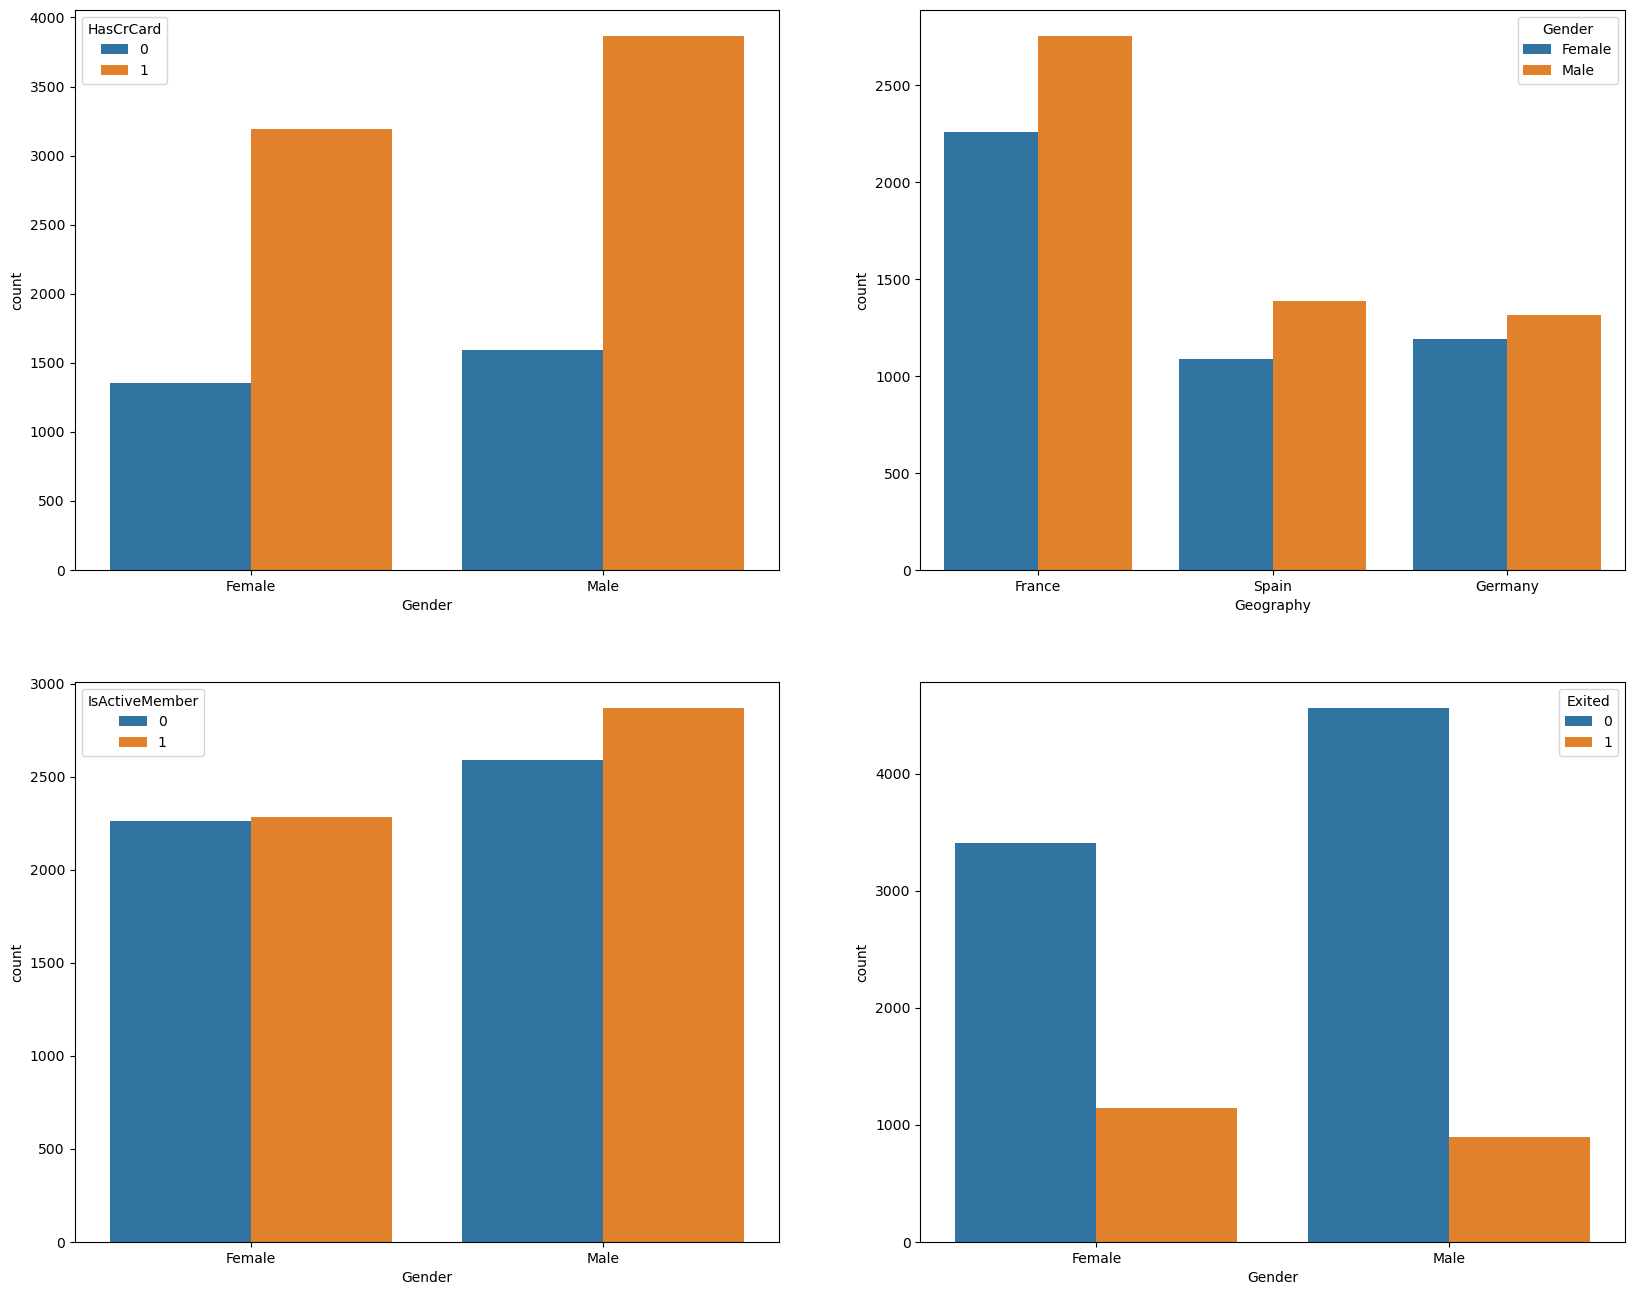

In [441]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sn.countplot(x=data['Gender'], hue = data['HasCrCard'])

plt.subplot(2, 2,2)
sn.countplot(x=data['Geography'], hue = data['Gender'])

plt.subplot(2, 2, 3)
sn.countplot(x=data['Gender'], hue = data['IsActiveMember'])

plt.subplot(2,2,4)
sn.countplot(x=data['Gender'], hue = data['Exited'])

# Data preprocessing

### Encoding of the categorical features

In [442]:
le = LabelEncoder()
for feature in ['Geography', 'Card Type', 'age_bins', 'Gender']:
    data[feature] =le.fit_transform(data[feature])
    
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,age_bins
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,1
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,0,300,1
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0,5,2,771,1
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,3,564,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,1,339,1


<Axes: >

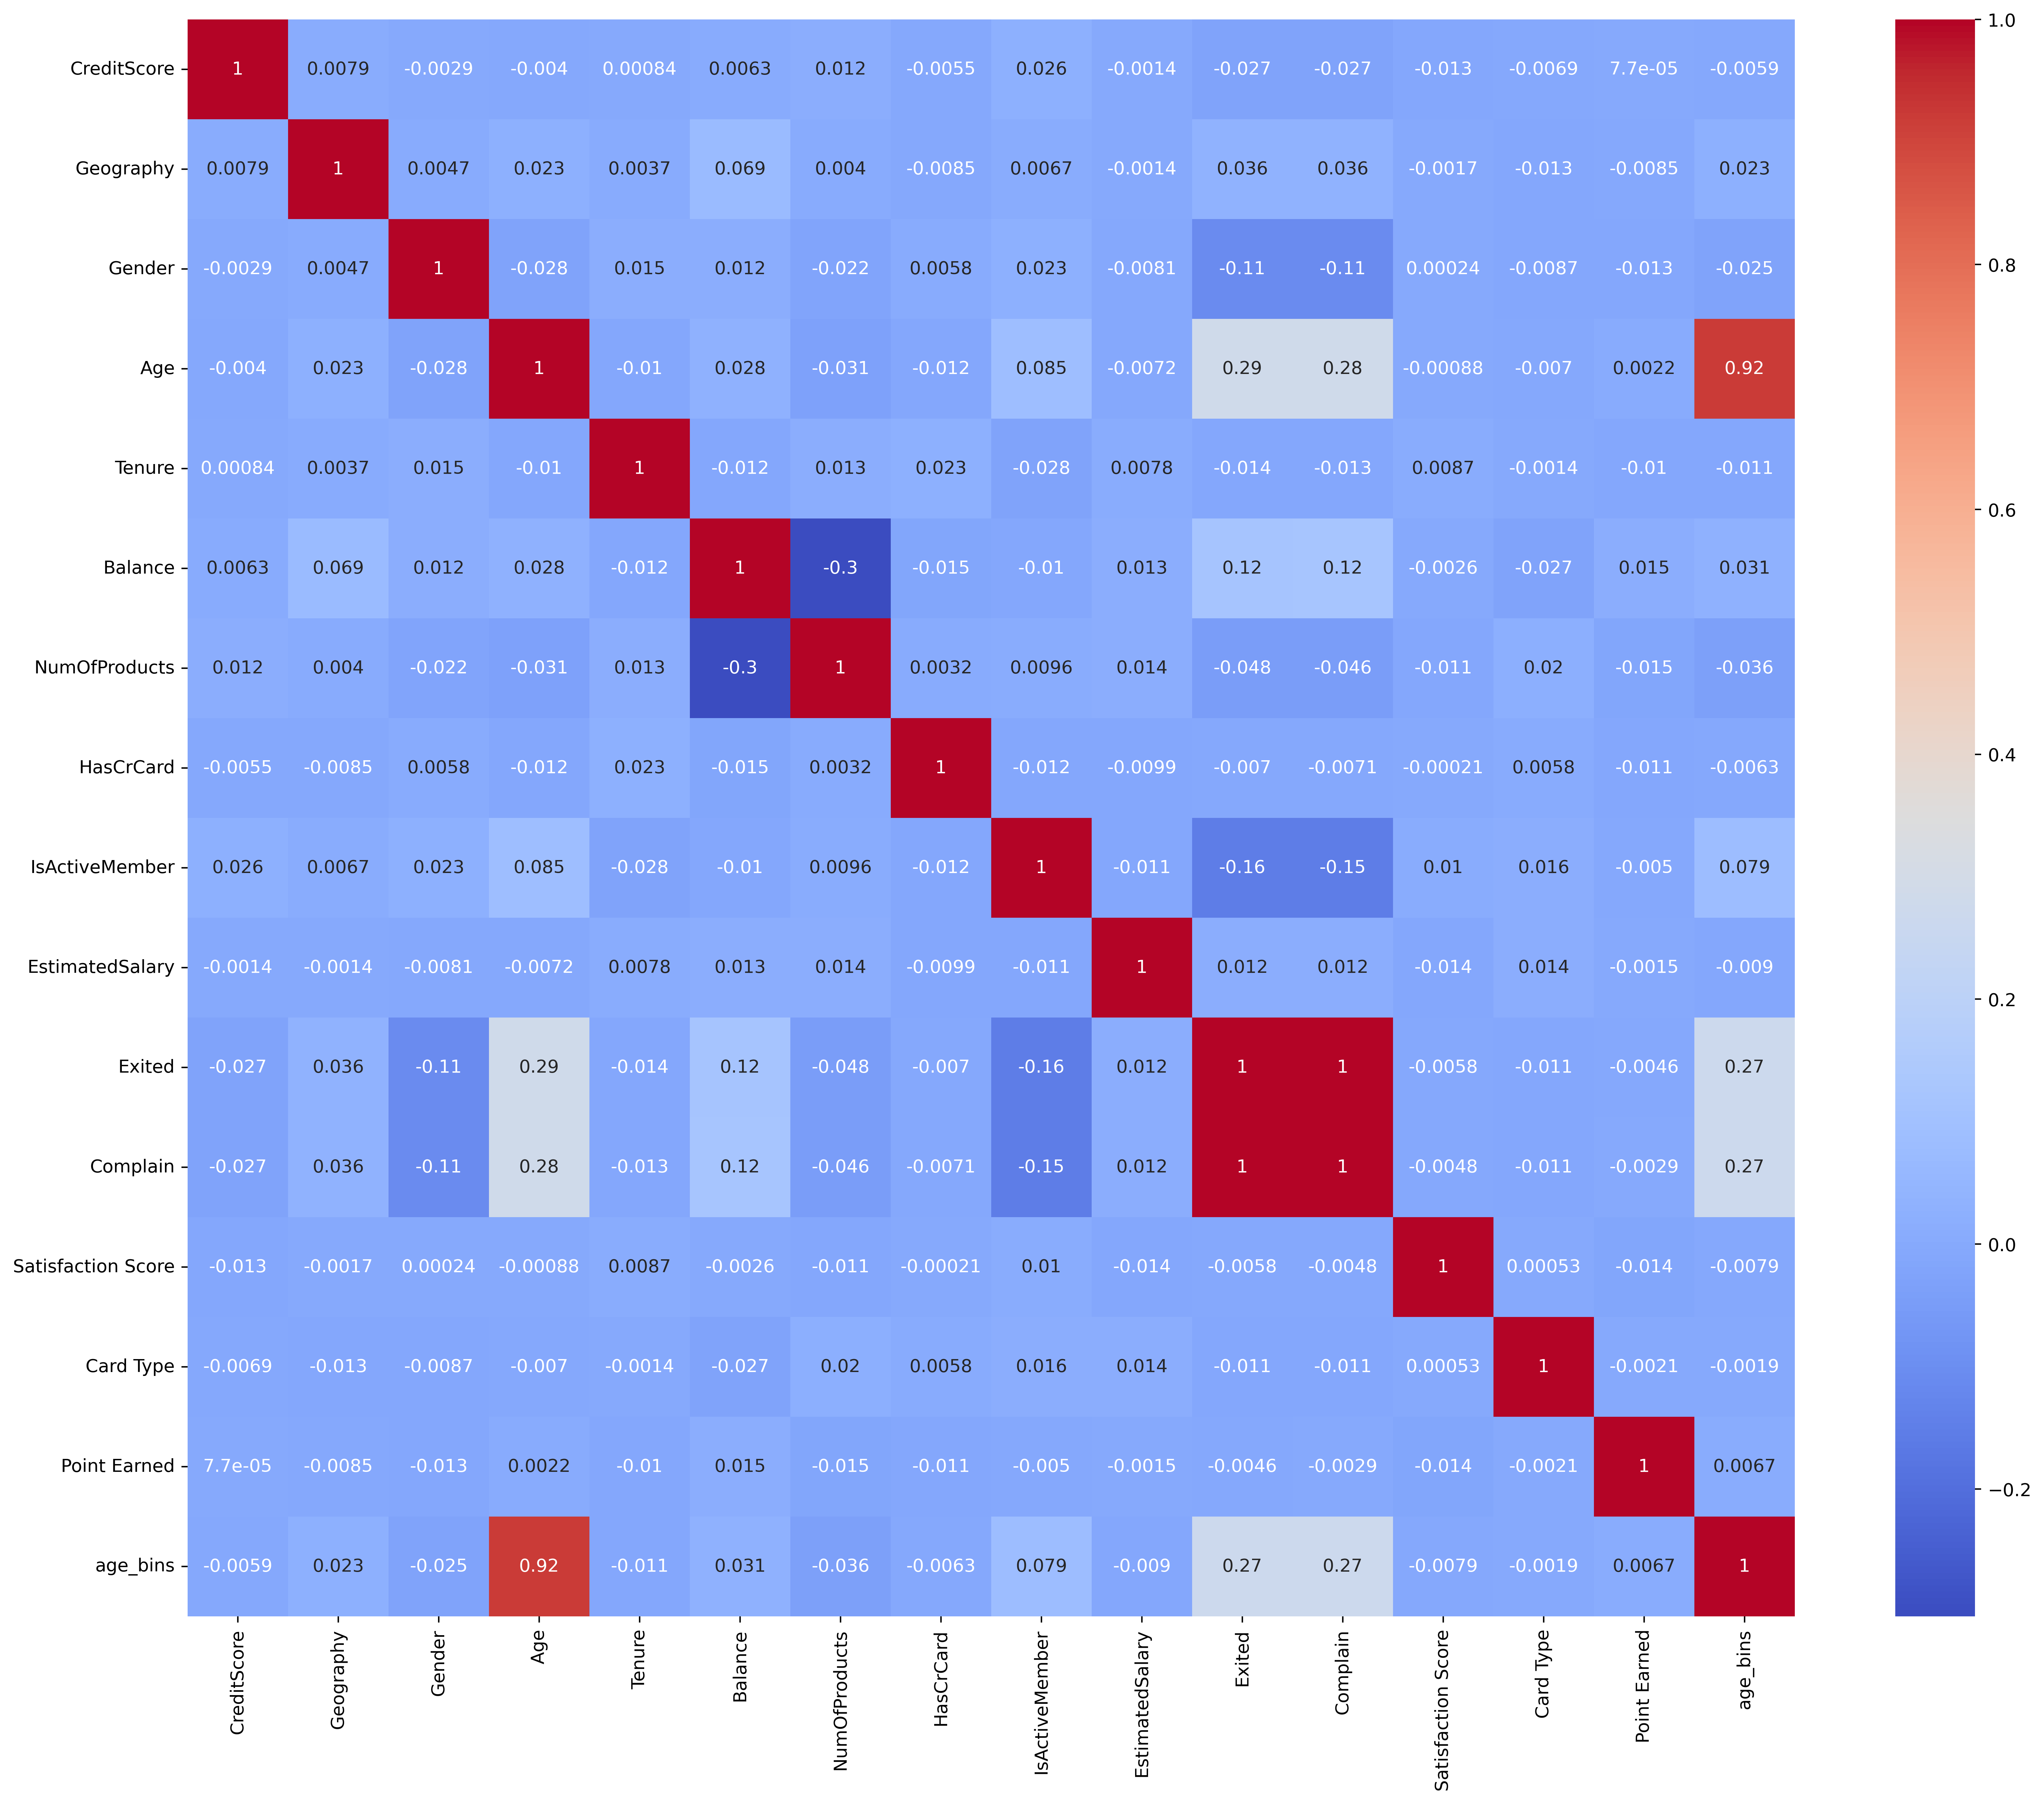

In [443]:
plt.figure(figsize=(20, 16), dpi = 400)
sn.heatmap(data.corr(), annot=True, cmap = 'coolwarm')

The correlation matrix above is used to check how related the features are, as it is shown the exited and the complain 

### Dependent and Independent variable separation

In [444]:
X = data.drop(['Exited', 'Age', 'Complain'], axis = 1)
y = data['Exited']

### Feature scaling

In [445]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Data Splitting

In [446]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [447]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=3)

#  Model building

In [448]:
nb_model = GaussianNB()

In [449]:
nb_model.fit(X_train, y_train)
results = nb_model.predict(X_test)
print(f'accuracy score is {accuracy_score(y_test, results)}')
# print(f'f1 score is {f1_score(y_test, results)}')

accuracy score is 0.821


In [450]:
knn_model = KNeighborsClassifier()

In [451]:
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(f'accuracy score is {accuracy_score(y_test, knn_pred)}')
# print(f'f1 score is {f1_score(y_test, knn_pred)}')

accuracy score is 0.8146666666666667


## Handling Imbalanced target

In [452]:
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [453]:
nb_model.fit(X_resample, y_resample)
results = nb_model.predict(X_test)
print(f'accuracy score is {accuracy_score(y_test, results)}')
# print(f'f1 score is {f1_score(y_test, results)}')

accuracy score is 0.7226666666666667


# Feature selection

In [454]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [455]:
selector = SelectPercentile(f_classif, percentile = 60)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [456]:
nb_model.fit(X_train_selected, y_train)
result = nb_model.predict(X_test_selected)

print(f'accuracy score is {accuracy_score(y_test, result)}')
#print(f'f1 score is {f1_score(y_test, result)}')

accuracy score is 0.8196666666666667
